In [14]:
from plumber import Stream, Pipe, PipeLine

artifact_path = "/home/nuttidalab/Documents/plab/plumber/artifacts"

In [17]:
class ExampleStream(Stream):
    def __init__(self, label: str) -> None:
        super().__init__(label)
        
        self.data[label] = "hi"

class ExamplePipe(Pipe):
    def __init__(self, label: str) -> None:
        super().__init__(label)

    def pipe(self, inputs):
        return str(inputs.keys())

input_stream = ExampleStream('input_stream')

pipe1 = ExamplePipe('pipe1')
pipe2 = ExamplePipe('pipe2')
pipe3 = ExamplePipe('pipe3')
pipe4 = ExamplePipe('pipe4')


PL = PipeLine()

PL.register(input_stream, pipe1)
PL.register(input_stream, pipe3)

PL.register(pipe1, pipe2)
PL.register(pipe3, pipe2)
PL.register(pipe2, pipe4)
PL.flow(input_stream)

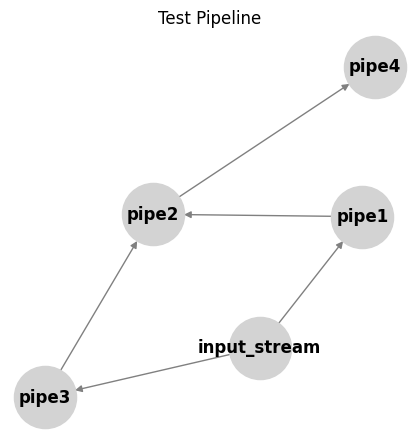

In [16]:
PL.plot(title="Test Pipeline")

In [4]:
from plumber.streams import IBLEidStream
from plumber.pipes import DaartInf, IBLMarkerExtractor, SimpleEnsembler

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/params.py:184: UserWarning: Warning: the directory provided is already a cache for another URL.
  warnings.warn('Warning: the directory provided is already a cache for another URL.')


In [5]:
# One stream
input_stream = IBLEidStream('eid_stream', 0)

# 3 pipes
extractor = IBLMarkerExtractor('markers', artifact_path, smooth=False)
smooth_extractor = IBLMarkerExtractor('smooth_markers', artifact_path, smooth=True)
predictor = DaartInf('daart_inf', artifact_path)
ensembler = SimpleEnsembler('simple_ensembler')


# 1 pipeline
PL = PipeLine()
PL.register(input_stream, extractor)
PL.register(input_stream, smooth_extractor)
PL.register(extractor, predictor)
PL.register(smooth_extractor, predictor)
PL.register(predictor, ensembler)

PL.flow(input_stream)

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/nuttidalab/Documents/plab/plumber/plumber/pipes/daart_inf.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We re

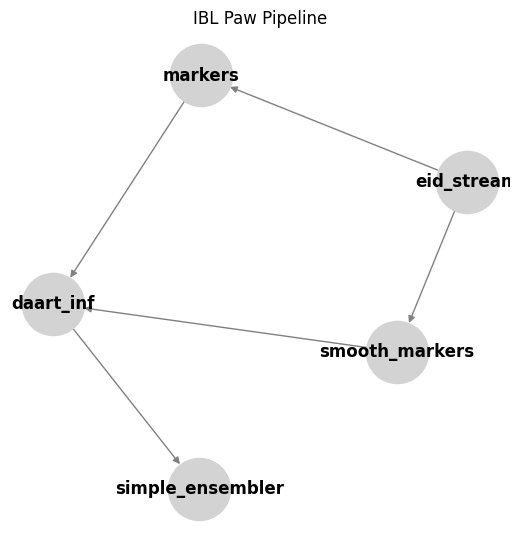

In [11]:
PL.plot(title="IBL Paw Pipeline", figsize=(5, 5), dpi=100)